# Assignment Lecture 4


Garcia, James Matthew C. <br>
BSCS - 1
***

* Kruskal's Algorithm
* Prim's Algorithm
* Djitraka's Shortest Path Algorithm

Given the following graph, implement the algorithms in Python.

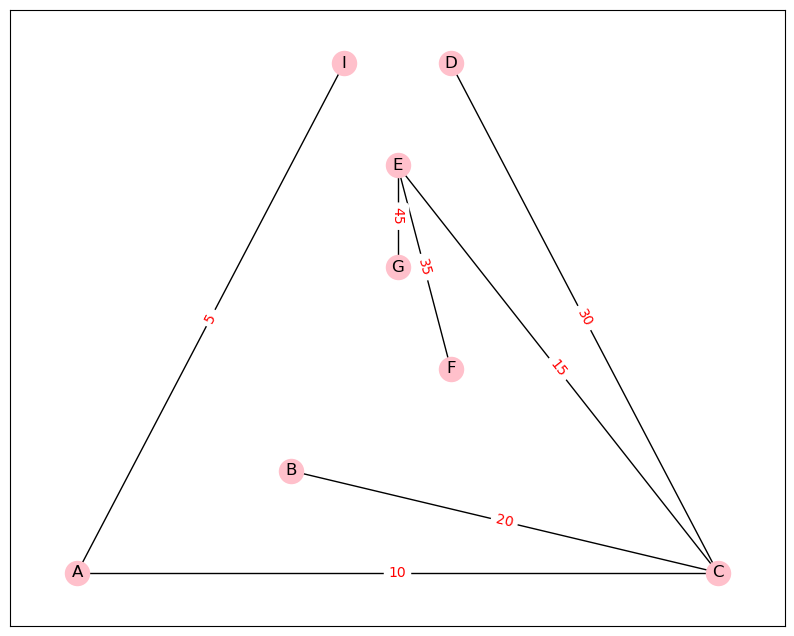

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

# Create the graph
G = nx.Graph()

# Add nodes
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])

# Add edges with weights
edgelist = [
    ("A", "C", {"weight": 10}),
    ("A", "I", {"weight": 5}),
    ("C", "B", {"weight": 20}),
    ("C", "E", {"weight": 15}),
    ("C", "D", {"weight": 30}),
    ("B", "E", {"weight": 25}),
    ("I", "E", {"weight": 40}),
    ("E", "F", {"weight": 35}),
    ("F", "G", {"weight": 50}),
    ("G", "E", {"weight": 45}),
]

G.add_edges_from(edgelist)

# Compute the minimum spanning tree using Kruskal's algorithm
mst = nx.minimum_spanning_tree(G)

# Plotting
plt.figure(figsize=(10, 8))

# Layout
pos = nx.planar_layout(G)

# Draw the MST edges
nx.draw_networkx_edges(G, pos, edgelist=mst.edges(), edge_color='black')

# Draw the original graph nodes
nx.draw_networkx_nodes(G, pos, node_color='pink')

# Draw edge labels for edges present in MST
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={(u, v): d["weight"] for u, v, d in G.edges(data=True) if (u, v) in mst.edges()},
    font_color='red'
)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.show()

## Kruskal's Algorithm

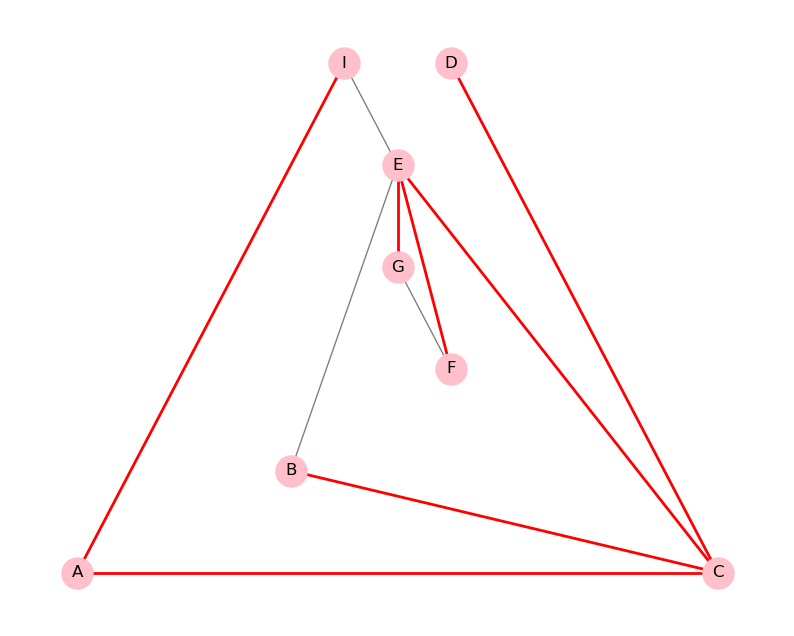

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

def kruskal_mst(graph):
    edges = []
    for u, v, w in graph.edges(data=True):
        edges.append((u, v, w['weight']))
    edges.sort(key=lambda x: x[2]) 

    mst_edges = []
    parent = {node: node for node in graph.nodes()}
    rank = {node: 0 for node in graph.nodes()}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(u, v):
        root_u = find(u)
        root_v = find(v)
        if root_u != root_v:
            if rank[root_u] < rank[root_v]:
                parent[root_u] = root_v
            elif rank[root_u] > rank[root_v]:
                parent[root_v] = root_u
            else:
                parent[root_v] = root_u
                rank[root_u] += 1
            return True
        return False

    for u, v, weight in edges:
        if union(u, v):
            mst_edges.append((u, v))

    return mst_edges

def draw_graph_with_mst(graph, mst_edges):
    pos = nx.planar_layout(graph)
    plt.figure(figsize=(10, 8))

    nx.draw_networkx_edges(graph, pos, edgelist=mst_edges, edge_color='red', width=2)

    non_mst_edges = [edge for edge in graph.edges() if edge not in mst_edges]
    nx.draw_networkx_edges(graph, pos, edgelist=non_mst_edges, edge_color='gray', width=1, alpha=1)

    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='pink')
    nx.draw_networkx_labels(graph, pos)

    plt.axis('off')
    plt.show()

G = nx.Graph()
G.add_nodes_from(["A","B","C","D","E","F","G"])
edgelist = [("A","C", 10),("A","I", 5),("C","B", 20),("C","E", 15),("C","D", 30),("B","E", 25),("I","E", 40),("E","F", 35),("F","G", 50),("G","E", 45)]
G.add_weighted_edges_from(edgelist)

mst = kruskal_mst(G)
draw_graph_with_mst(G, mst)

## Prim's Algorithm

C:\Users\USER\AppData\Local\Temp\ipykernel_22236\3692217799.py:16: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos, edgelist=non_mst_edges, edge_color='gray', width=1, alpha=1)


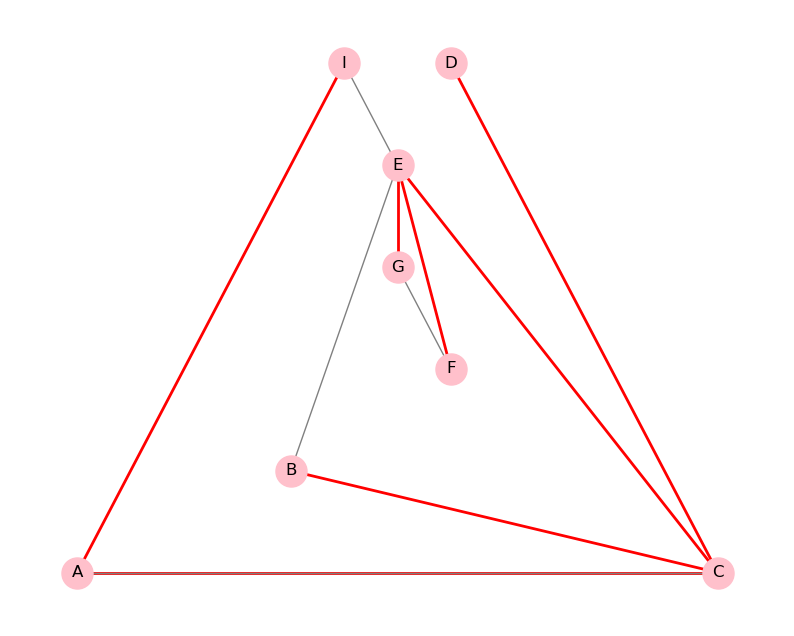

In [24]:
import matplotlib.pyplot as plt
import networkx as nx

def prim_mst(graph):
    mst_edges = nx.minimum_spanning_edges(graph, algorithm='prim', data=False)
    return list(mst_edges)

def draw_graph_with_mst(graph, mst_edges):
    pos = nx.planar_layout(graph)  

    plt.figure(figsize=(10, 8))

    nx.draw_networkx_edges(graph, pos, edgelist=mst_edges, edge_color='red', width=2)

    non_mst_edges = [edge for edge in graph.edges() if edge not in mst_edges]
    nx.draw_networkx_edges(graph, pos, edgelist=non_mst_edges, edge_color='gray', width=1, alpha=1)

    nx.draw_networkx_nodes(graph, pos, node_size=500, node_color='pink')
    nx.draw_networkx_labels(graph, pos)

    plt.axis('off')
    plt.show()

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

mst_edges = prim_mst(G)

draw_graph_with_mst(G, mst_edges)

## Dijkstra's Shortest Path Algorithm

C:\Users\USER\AppData\Local\Temp\ipykernel_22236\3032909199.py:42: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(graph, pos, edgelist=shortest_path_edges, edge_color='red', width=2)


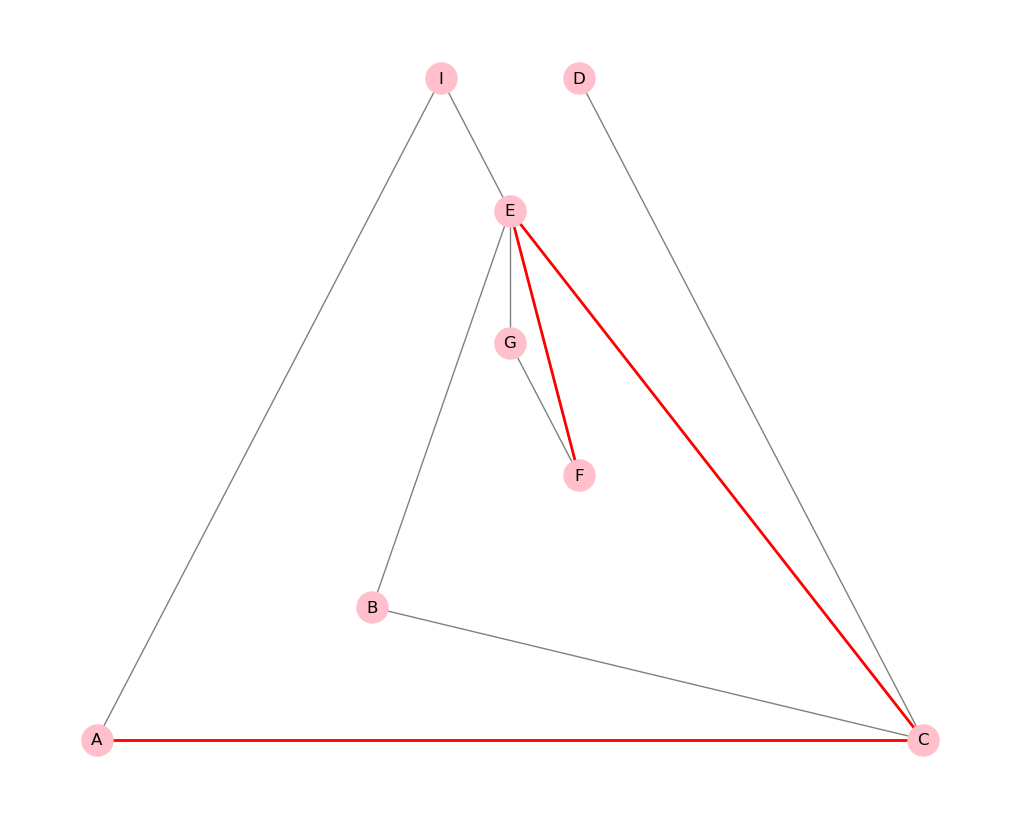

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import heapq

def dijkstra_shortest_paths(graph, source):
    distances = {node: float('inf') for node in graph.nodes()}
    distances[source] = 0

    pq = [(0, source)]
    heapq.heapify(pq)

    predecessors = {}

    while pq:
        dist_to_u, u = heapq.heappop(pq)

        if dist_to_u > distances[u]:
            continue

        for v, w in graph[u].items():
            dist_to_v = dist_to_u + w['weight']
            if dist_to_v < distances[v]:
                distances[v] = dist_to_v
                heapq.heappush(pq, (dist_to_v, v))
                predecessors[v] = u

    return distances, predecessors

def highlight_shortest_path(graph, source, target, predecessors):
    path = [target]
    while path[-1] != source:
        path.append(predecessors[path[-1]])
    shortest_path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    return shortest_path_edges

def draw_graph_with_shortest_path(graph, shortest_path_edges):
    plt.figure(figsize=(10, 8))

    pos = nx.planar_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='pink', edge_color='gray', width=1, alpha=1)

    nx.draw_networkx_edges(graph, pos, edgelist=shortest_path_edges, edge_color='red', width=2)

    plt.axis('off')
    plt.show()

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30), ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]
G.add_weighted_edges_from(edgelist)

distances, predecessors = dijkstra_shortest_paths(G, 'A')

shortest_path_edges = highlight_shortest_path(G, 'A', 'F', predecessors)

draw_graph_with_shortest_path(G, shortest_path_edges)